## Iris Flower Classification machine learning

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

### Loading the data

In [2]:
# First, let's load the dataset to understand its structure and content.
df = pd.read_csv('iris.csv')

In [7]:
# Display the first few rows of the dataset to understand its structure
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Preprocessing the data

In [10]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values in the dataset.

In [13]:
# Dropping the 'Id' column as it's not useful
df.drop('Id', axis=1, inplace=True)

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


For easy analysis, the 'Species' column will be encoded (Iris-setosa is encoded as 0, Iris-versicolor as 1, and Iris-virginica as 2.)

In [15]:

# Encoding the 'Species' column
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [16]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Building the model

Split the data into features and target

In [17]:
# Splitting the data into features and target
X = df.drop('Species', axis=1)
y = df['Species']

X.head(), y.head()

(   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0            5.1           3.5            1.4           0.2
 1            4.9           3.0            1.4           0.2
 2            4.7           3.2            1.3           0.2
 3            4.6           3.1            1.5           0.2
 4            5.0           3.6            1.4           0.2,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Species, dtype: int64)

In [19]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% testing

# Checking the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((105, 4), (45, 4), (105,), (45,))

<p>Training Set: 105 samples (70% of the dataset)</p>
<p>Testing Set: 45 samples (30% of the dataset)</p>
<p>Features: 4 (Sepal Length, Sepal Width, Petal Length, Petal Width)</p>

Training the model Decision Tree

In [30]:

# Training the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(accuracy)
print(classification_report_str)


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



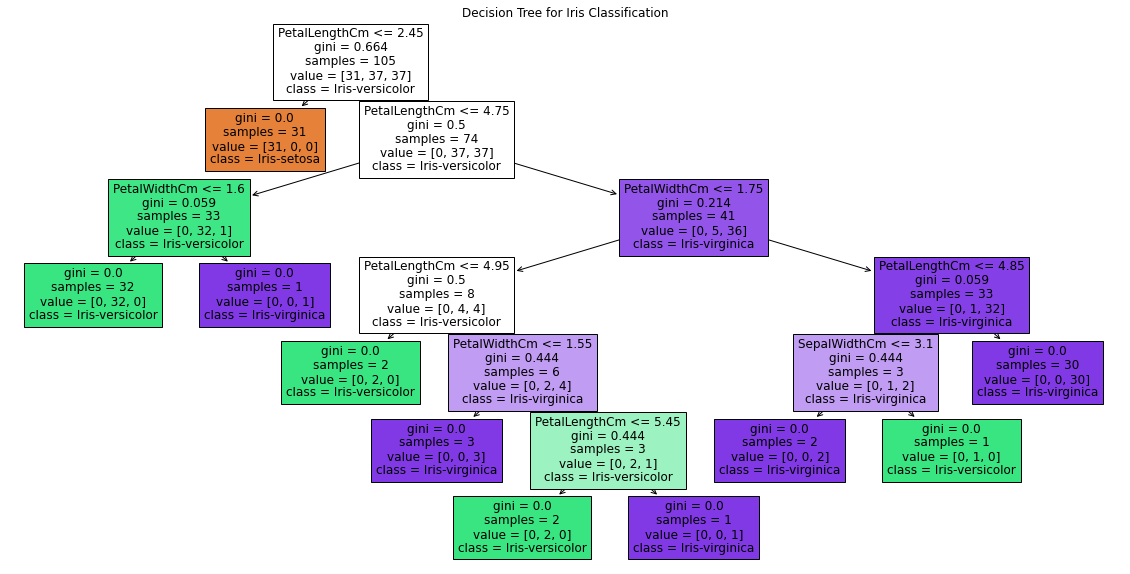

In [33]:
# Visualizing the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, 
               feature_names=X.columns,  
               class_names=le.classes_,
               filled=True)
plt.title("Decision Tree for Iris Classification")
plt.show()

<p>The Decision Tree Classifier achieved an accuracy of 100% on the test set, which is an excellent result. The classification report provides detailed metrics for each class (species of Iris):</p>

<p>Precision: Measures the accuracy of positive predictions. In this case, for each species, the model correctly identified 100% of the instances.</p>
<p>Recall: Indicates the ability of the model to find all the relevant instances. The model successfully identified all instances of each species.</p>
<p>F1-Score: A weighted average of precision and recall. The F1-score is also 1.00 for each species, indicating a perfect balance between precision and recall.</p>
<p>Support: The number of actual occurrences of each class in the test set.</p>
<p>These results suggest that the model is highly effective at classifying the Iris species based on the given measurements. </p>